# Exercise 2.5 - Visual Weather Systems CNN

## 1. Import Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [4]:
# Download the weather images and put them in a directory
path = r'C:\Users\kyles\CareerFoundary\Machine Learning\Achievement 2\06 Extra\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


## 2. Preprocessing Images

In [6]:
# This will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12, # Reduced from 32 in an attempt to resolve an issue later on (also tried 16 with no success)
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12, # Same as above
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [7]:
# This is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

## 3. Compiling and Running the Model

In [9]:
# Compile and run the model
# How many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 20, # Previous attempts: 10, 15
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/20


C:\Users\kyles\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.5265 - loss: 0.1459 - val_accuracy: 0.6065 - val_loss: 0.1375
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6667 - loss: 0.1256 - val_accuracy: 0.6250 - val_loss: 0.1615
Epoch 3/20


C:\Users\kyles\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 204ms/step - accuracy: 0.7693 - loss: 0.0843 - val_accuracy: 0.8102 - val_loss: 0.0707
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9167 - loss: 0.0354 - val_accuracy: 0.8750 - val_loss: 0.0468
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - accuracy: 0.8045 - loss: 0.0772 - val_accuracy: 0.7685 - val_loss: 0.0808
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.8333 - loss: 0.0623 - val_accuracy: 0.7500 - val_loss: 0.0971
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 210ms/step - accuracy: 0.8122 - loss: 0.0682 - val_accuracy: 0.8241 - val_loss: 0.0659
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.8333 - loss: 0.0583 - val_accuracy: 0.7500 - val_loss: 0.1207
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 0.8150 - loss: 0.0671 - val_accuracy: 0.7778 - val_loss: 0.0860
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.9167 - loss: 0.0417 - val_accuracy: 0.8750 - v

## 4. Results

In [11]:
results = pd.DataFrame(model.history.history) # There was a value error when the batch size was 32 (fixed when changed to 12 for some reason)

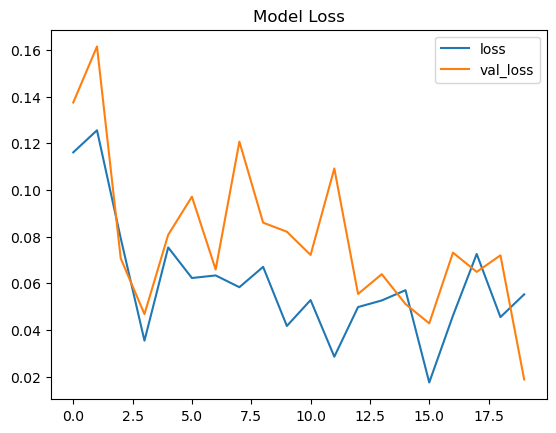

In [12]:
results[['loss', 'val_loss']].plot(title = 'Model Loss')
plt.savefig('./loss.png')

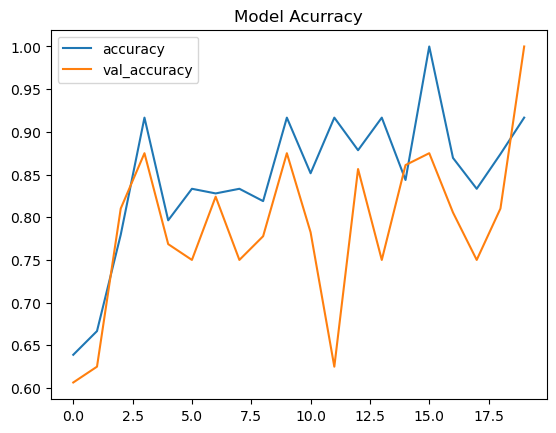

In [13]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [14]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9166666865348816, Val_Accuracy: 1.0
Loss: 0.05523942410945892, Val_Loss: 0.018748223781585693


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


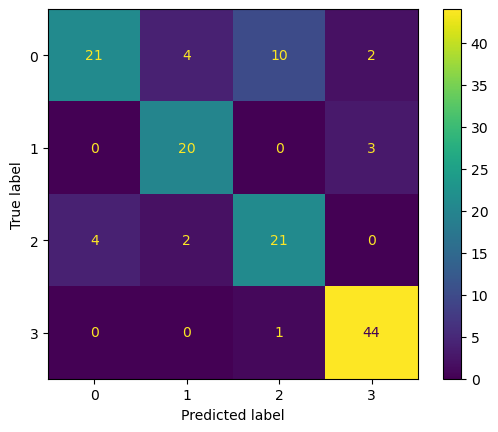

In [15]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [46]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


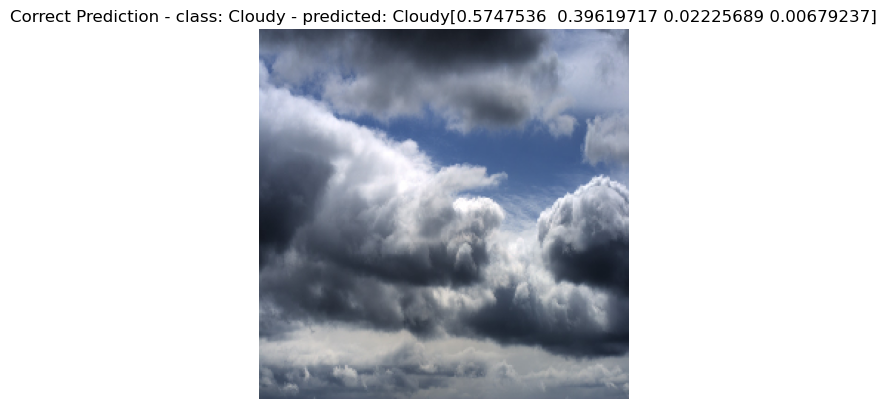

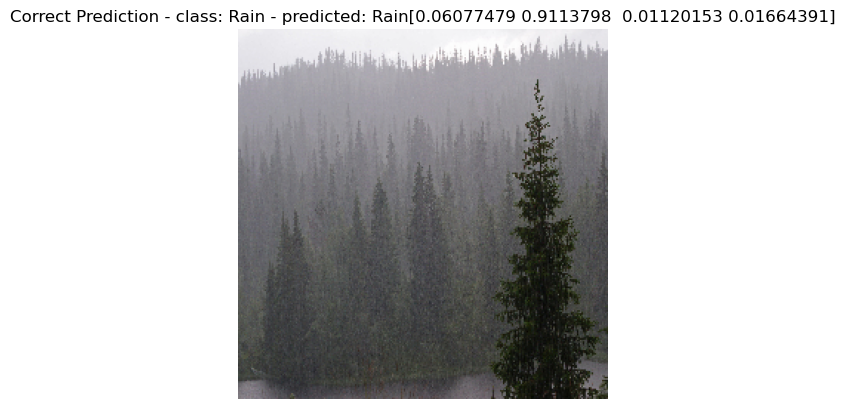

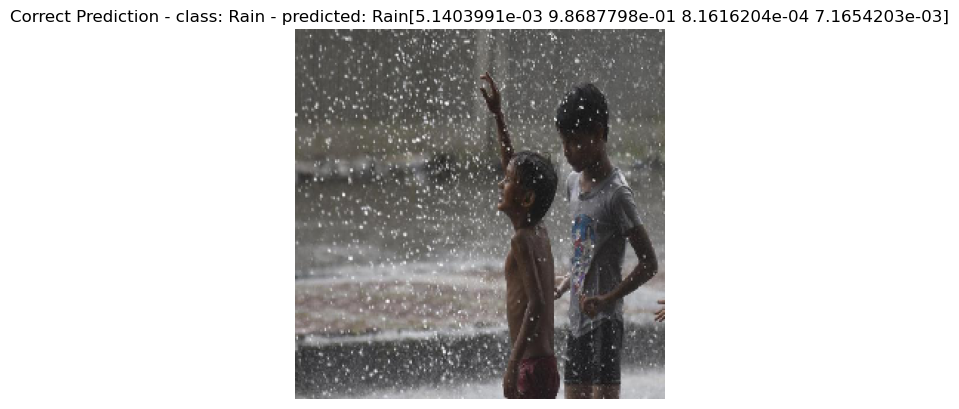

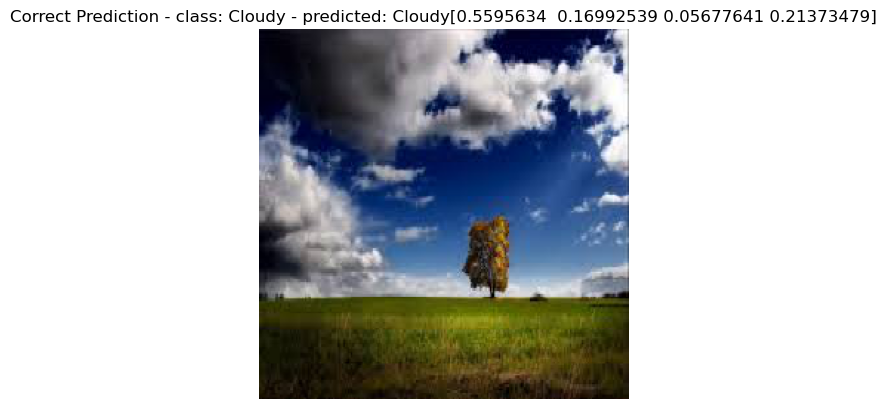

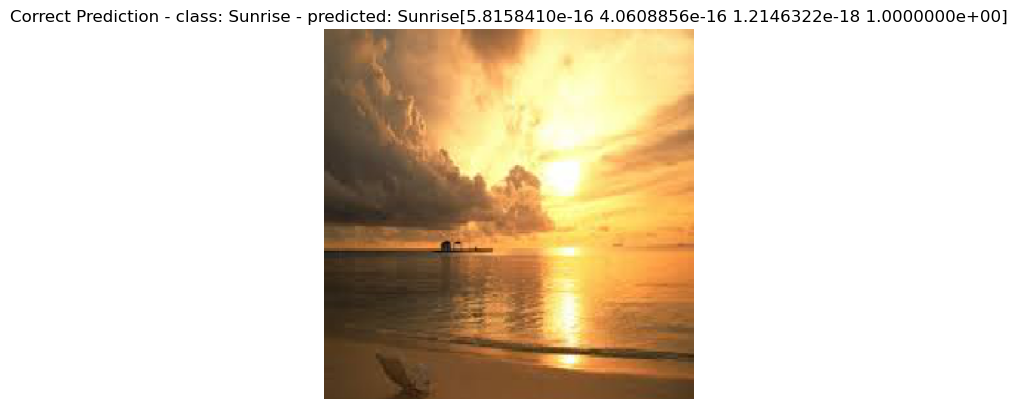

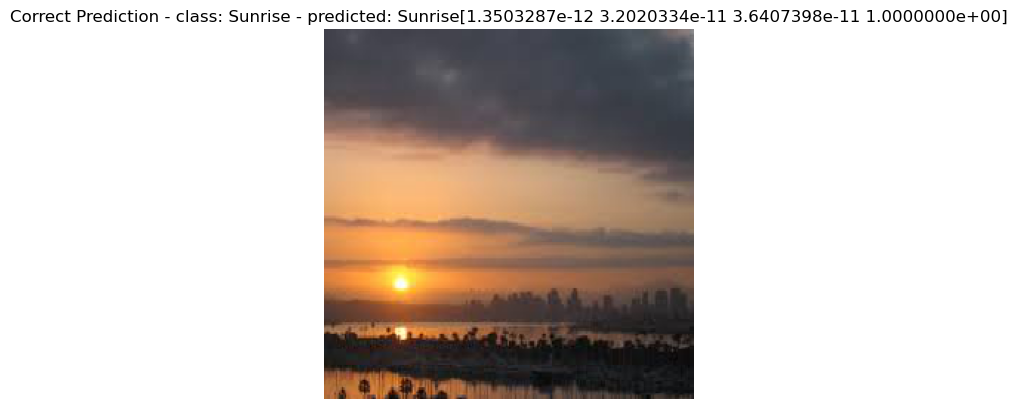

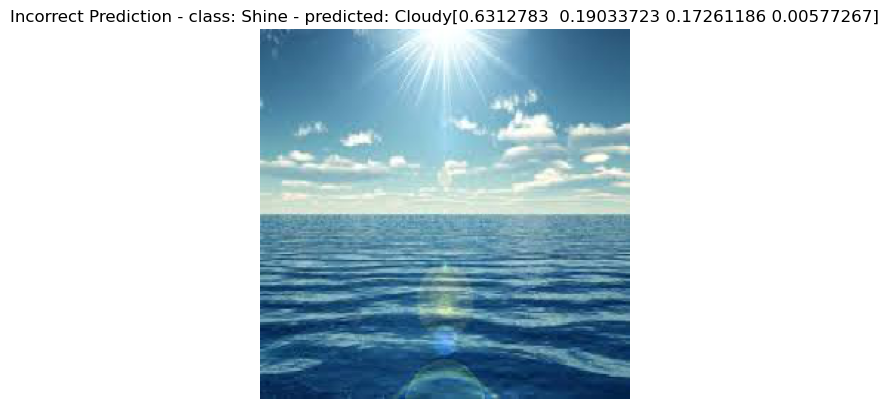

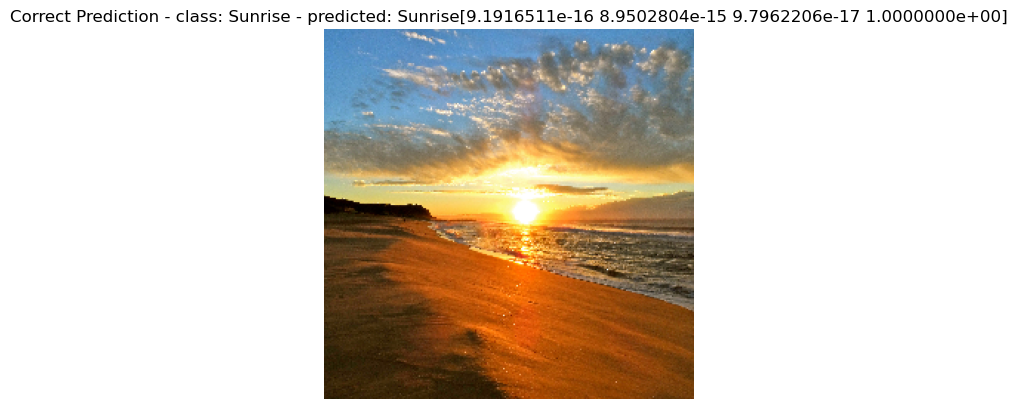

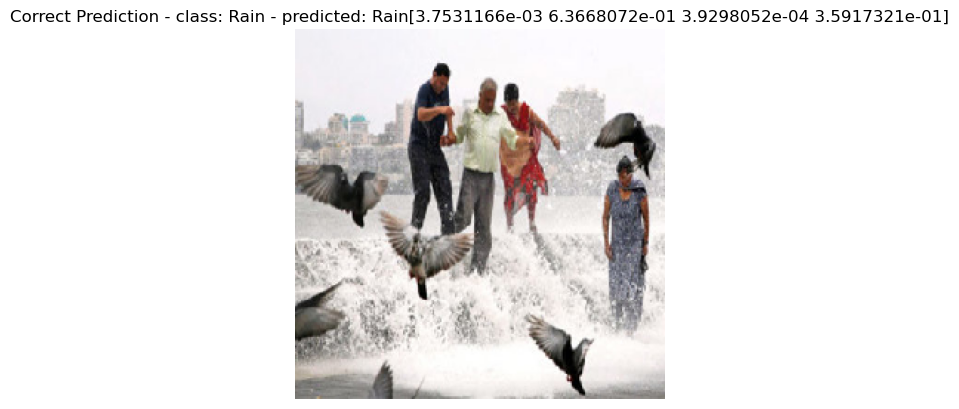

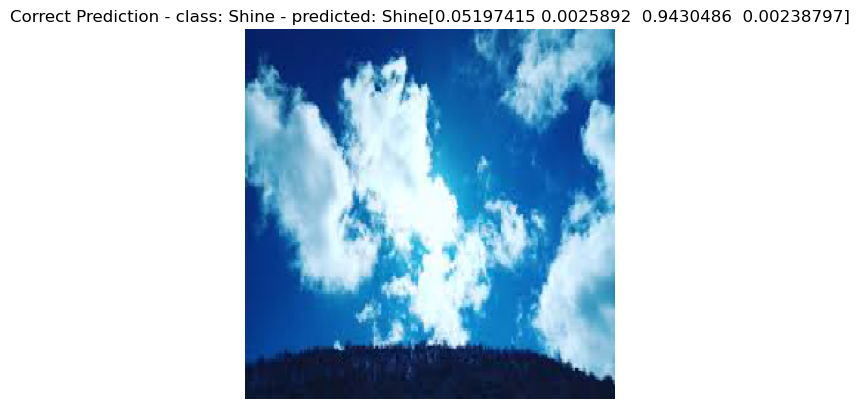

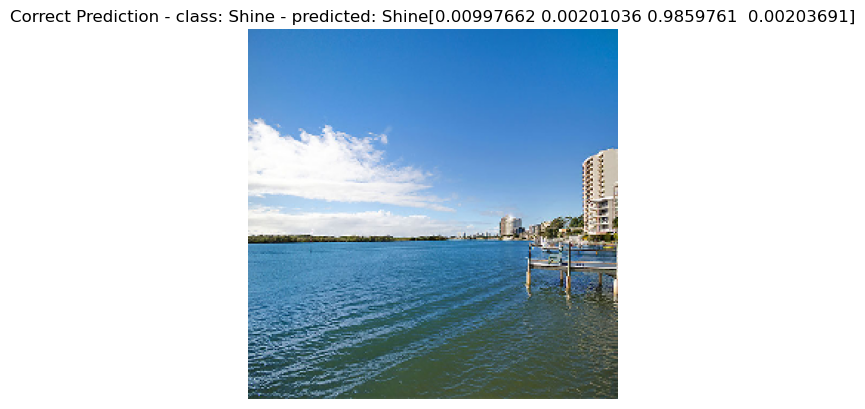

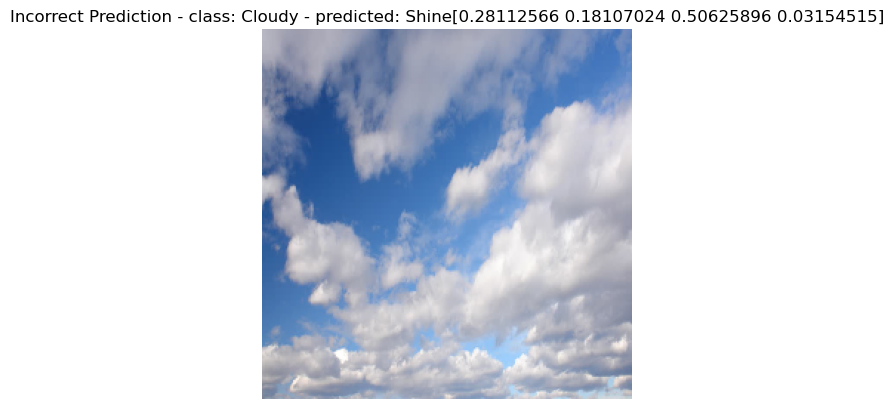

In [52]:
predict_one(model, 12) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

## 5. Bonus Task

Take a picture of one or more of the four weather conditions in part 2 of the task near where you live. Does your model correctly identify it? Upload the picture(s), as well as what the algorithm thought it was.

In [20]:
from PIL import Image

In [21]:
path = r'C:\Users\kyles\CareerFoundary\Machine Learning\Achievement 2\06 Extra'
img = Image.open(os.path.join(path, 'Weather_Bonus.png'))
print(img.format)
print(img.size)
print(img.mode)

PNG
(606, 807)
RGBA


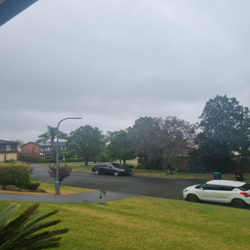

In [22]:
newsize = (250,250)
img2 = img.resize(newsize)
img2

In [23]:
# Define the function to predict and display a single image

def predict_one(model, img2, class_names):
    # Convert image to RGB (since it is RGBA currently)
    img2_rgb = img2.convert('RGB')
    
    # Convert to NumPy array for model
    img_array = np.array(img2_rgb)

    # Add batch dimension to the image, since model expects batches
    img_array = np.expand_dims(img_array, axis=0)

    # Predice the class
    predicted_batch = model.predict(img_array)
    predicted_class = class_names[np.argmax(predicted_batch[0])]
    value_predicted = predicted_batch[0]

    # Display the image and prediction together
    plt.figure()
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.imshow(img2_rgb)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


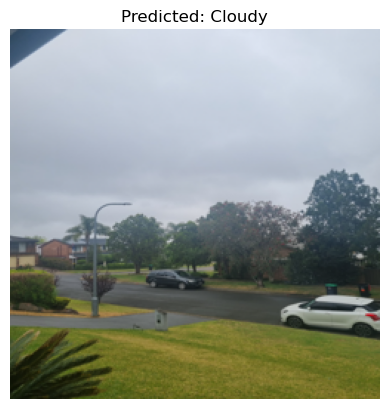

In [24]:
# Call function above
predict_one(model, img2, class_names)